In [1]:
import pandas as pd

# Read data 

In [2]:
data=pd.read_csv("PQ Data.csv")

## profiling 

In [3]:
data.head()


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
0,2/19/2016,29,F,United States,Washington,Accessories,Tires and Tubes,1,$80,$109
1,2/20/2016,29,F,United States,Washington,Clothing,Gloves,2,$25,$29
2,2/27/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$4,$5
3,3/12/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$88,$117
4,3/12/2016,29,F,United States,Washington,Accessories,Tires and Tubes,3,$35,$42


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34865 entries, 0 to 34864
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              34865 non-null  object
 1   Customer Age      34865 non-null  int64 
 2   Customer Gender   34865 non-null  object
 3   Country           34865 non-null  object
 4   State             34865 non-null  object
 5   Product Category  34865 non-null  object
 6   Sub Category      34865 non-null  object
 7   Quantity          34865 non-null  int64 
 8   Unit Cost         34865 non-null  object
 9   Unit Price        34865 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


In [5]:
data.duplicated().sum()

np.int64(4)

In [6]:
dup=data.duplicated()

In [7]:
data['Customer Age'].describe()

count    34865.000000
mean        36.382705
std         11.113005
min         17.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         87.000000
Name: Customer Age, dtype: float64

In [8]:
data['Customer Age'].min()

17

In [9]:
data['Customer Age'].unique()

array([29, 18, 19, 20, 22, 24, 40, 21, 23, 25, 30, 55, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 41, 42, 65, 64, 32, 33, 63, 34, 35, 43, 62, 37, 44,
       60, 59, 58, 36, 61, 57, 54, 38, 39, 27, 28, 17, 26, 67, 66, 71, 31,
       56, 87, 70, 69, 73, 68, 75, 86, 85, 77, 81, 84, 78, 72, 80, 74, 76,
       79, 82])

In [10]:
data.describe()

,Customer Age,Quantity
count,34865.000000,34865.000000
mean,36.382705,2.002553
std,11.113005,0.813965
min,17.000000,1.000000
25%,28.000000,1.000000
50%,35.000000,2.000000
75%,44.000000,3.000000
max,87.000000,3.000000


## Data cleaning 

In [11]:
data.dtypes

Date                object
Customer Age         int64
Customer Gender     object
Country             object
State               object
Product Category    object
Sub Category        object
Quantity             int64
Unit Cost           object
Unit Price          object
dtype: object

In [12]:
data.Date=pd.to_datetime(data['Date'])

In [13]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
17901,2015-09-07,24,M,Germany,Hessen,Clothing,Jerseys,3,$433,$572


In [14]:
data.dtypes

Date                datetime64[ns]
Customer Age                 int64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                     int64
Unit Cost                   object
Unit Price                  object
dtype: object

In [15]:
data["Unit Price"]

0          $109 
1           $29 
2            $5 
3          $117 
4           $42 
          ...   
34860    $1,487 
34861      $986 
34862    $1,583 
34863      $561 
34864    $1,568 
Name: Unit Price, Length: 34865, dtype: object

In [16]:
data["Unit Price"]=data["Unit Price"].str.replace("$","").str.replace(",","")

In [17]:
data["Unit Price"]=data["Unit Price"].astype("int")

In [18]:
data["Unit Cost"]=data["Unit Cost"].str.replace("$","").str.replace(",","")

In [19]:
data["Unit Cost"]=data["Unit Cost"].astype("int")

In [20]:
data.dtypes

Date                datetime64[ns]
Customer Age                 int64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                     int64
Unit Cost                    int64
Unit Price                   int64
dtype: object

In [21]:
data.describe()

,Date,Customer Age,Quantity,Unit Cost,Unit Price
count,34865,34865.000000,34865.000000,34865.000000,34865.000000
mean,2016-01-19 18:41:43.530761472,36.382705,2.002553,349.948860,389.325541
min,2015-01-01 00:00:00,17.000000,1.000000,1.000000,1.000000
25%,2015-10-26 00:00:00,28.000000,1.000000,45.000000,54.000000
50%,2016-01-28 00:00:00,35.000000,2.000000,150.000000,179.000000
75%,2016-04-26 00:00:00,44.000000,3.000000,455.000000,521.000000
max,2016-07-31 00:00:00,87.000000,3.000000,3240.000000,5082.000000
std,NaN,11.113005,0.813965,490.010436,525.311617


In [22]:
data[data.duplicated()== True]

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
18340,2016-04-16,18,M,France,Seine (Paris),Accessories,Tires and Tubes,2,12,18
28289,2015-08-08,30,F,United States,California,Accessories,Tires and Tubes,2,20,22
31095,2015-12-13,27,M,United States,California,Accessories,Bottles and Cages,3,18,19
33087,2015-08-31,33,F,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,3,9,12


In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.shape

(34861, 10)

In [25]:
data.select_dtypes("object").describe()

,Customer Gender,Country,State,Product Category,Sub Category
count,34861,34861,34861,34861,34861
unique,2,4,45,3,17
top,M,United States,California,Accessories,Tires and Tubes
freq,17803,18074,10330,22529,11109


In [26]:
data['Product Category'].nunique()


3

In [27]:
data.sample()


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price
1504,2015-10-14,34,M,United States,California,Clothing,Caps,1,135,160


## Feature Extraction 

In [62]:
data["Total Cost"]= data['Quantity'] *data['Unit Cost']

In [63]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost
14460,2016-02-10,36,M,United Kingdom,England,Accessories,Tires and Tubes,3,67,86,258,Wednesday,February,2,10,2016,adult,201


In [64]:
data["Total Sales"]= data['Quantity'] *data['Unit Price']

In [53]:
data.sample()


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year
5485,2016-04-18,43,M,United States,California,Accessories,Tires and Tubes,3,21,27,81,Monday,April,4,18,2016


In [65]:
data['Profit']=data["Total Sales"]-data["Total Cost"]

In [66]:
data.sample()


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit
18398,2016-05-05,21,F,Germany,Hessen,Clothing,Socks,1,99,133,133,Thursday,May,5,5,2016,young,99,34


In [67]:
data['test']=0

In [68]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,test
4328,2016-04-17,25,F,Germany,Nordrhein-Westfalen,Accessories,Helmets,3,222,329,987,Sunday,April,4,17,2016,young,666,321,0


In [69]:
data.drop('test' , axis =1 , inplace= True )

In [70]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit
10020,2015-05-02,30,F,United States,California,Bikes,Mountain Bikes,1,2071,1869,1869,Saturday,May,5,2,2015,young,2071,-202


In [71]:
data['day_name']=data.Date.dt.day_name()

In [72]:
data['month_name']=data.Date.dt.month_name()

In [73]:
data['month']=data.Date.dt.month

In [74]:
data['day']=data.Date.dt.day

In [75]:
data['year']=data.Date.dt.year

In [76]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit
27097,2015-12-14,47,M,United States,California,Bikes,Touring Bikes,2,1192,1075,2150,Monday,December,12,14,2015,adult,2384,-234


In [77]:
def profit_classification(x) :
  if x > 0:
      return "positive"

  elif x ==0 :
     return "break-even"
  else :
     return "negative"

In [78]:
profit_classification(0)

'break-even'

In [79]:
data['profit class']=data.Profit.apply(profit_classification)

In [80]:
data.sample()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
25198,2016-04-09,35,F,United States,Washington,Accessories,Bottles and Cages,3,39,47,141,Saturday,April,4,9,2016,adult,117,24,positive


In [81]:
data['month_name']=data.Date.dt.month_name().str[:3]

In [82]:
data.sample()


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
16099,2016-01-15,35,M,United States,Washington,Accessories,Tires and Tubes,2,263,324,648,Friday,Jan,1,15,2016,adult,526,122,positive


In [83]:
def age_classification(x):
    if 17 <= x <= 30 :
        return 'young'
    elif 31 <= x <= 60 :
        return ' adult'
    else :
       return 'eldery'
    

In [84]:
age_classification(18)

'young'

In [85]:
data['age_class']=data['Customer Age'].apply(age_classification)

In [86]:
data.sample(5)


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
21563,2016-04-25,49,M,United States,California,Accessories,Hydration Packs,1,330,392,392,Monday,Apr,4,25,2016,adult,330,62,positive
28868,2016-07-12,20,F,United Kingdom,England,Accessories,Tires and Tubes,2,28,38,76,Tuesday,Jul,7,12,2016,young,56,20,positive
12040,2016-01-02,34,M,Germany,Saarland,Accessories,Cleaners,3,11,15,45,Saturday,Jan,1,2,2016,adult,33,12,positive
25075,2016-04-11,40,M,United States,California,Accessories,Bottles and Cages,3,90,115,345,Monday,Apr,4,11,2016,adult,270,75,positive
4855,2016-06-25,22,M,United States,California,Bikes,Road Bikes,1,1120,1109,1109,Saturday,Jun,6,25,2016,young,1120,-11,negative


In [87]:
pd.cut(x=data['Customer Age'],bins=[17,27,37,87],labels=['1','2','3'])

0        2
1        2
2        2
3        2
4        2
        ..
34860    3
34861    3
34862    3
34863    3
34864    3
Name: Customer Age, Length: 34861, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [88]:
data.sort_values(by='Total Sales' )

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
24738,2015-08-12,20,M,United States,Washington,Accessories,Tires and Tubes,1,2,2,2,Wednesday,Aug,8,12,2015,young,2,0,break-even
26567,2015-10-10,18,F,United States,California,Accessories,Tires and Tubes,2,1,1,2,Saturday,Oct,10,10,2015,young,2,0,break-even
16201,2015-12-16,36,M,United States,California,Accessories,Tires and Tubes,2,1,1,2,Wednesday,Dec,12,16,2015,adult,2,0,break-even
32237,2016-04-02,38,M,France,Nord,Accessories,Tires and Tubes,2,1,1,2,Saturday,Apr,4,2,2016,adult,2,0,break-even
29248,2015-12-16,45,F,United States,Oregon,Accessories,Tires and Tubes,2,1,1,2,Wednesday,Dec,12,16,2015,adult,2,0,break-even
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13074,2016-06-28,40,F,Germany,Nordrhein-Westfalen,Accessories,Bike Racks,2,1380,2110,4220,Tuesday,Jun,6,28,2016,adult,2760,1460,positive
4952,2016-01-17,53,F,United States,California,Accessories,Bike Racks,3,1200,1422,4266,Sunday,Jan,1,17,2016,adult,3600,666,positive
6094,2016-07-31,23,M,Germany,Saarland,Accessories,Bike Racks,3,1040,1517,4551,Sunday,Jul,7,31,2016,young,3120,1431,positive
2371,2016-02-12,46,M,United States,California,Accessories,Bike Racks,2,1800,2462,4924,Friday,Feb,2,12,2016,adult,3600,1324,positive


In [89]:
totalsales_of_country =data.pivot_table(index=['Country' ,'State'], values=['Total Sales','Profit'] , aggfunc='sum')

In [90]:
totalsales_of_country 


Profit  Total Sales
Country        State                                   
France         Charente-Maritime     -1320        37878
               Essonne               23009       337635
               Garonne (Haute)        6486        69698
               Hauts de Seine        31972       350149
               Loir et Cher           3824        31596
               Loiret                10695       118582
               Moselle                9979       120802
               Nord                  31448       513002
               Pas de Calais          3267        23047
               Seine (Paris)         56845       719288
               Seine Saint Denis     43227       520489
               Seine et Marne        11648       132952
               Somme                  1954        36052
               Val d'Oise             8700        76268
               Val de Marne           3836        42828
               Yveline               27313       316609
Germany        Bayern               124401       537489
               Brandenburg           19779        88455
               Hamburg              154531       714188
               Hessen               206369       917275
               Nordrhein-Westfalen  217464       931842
               Saarland             236622      1056051
United Kingdom England              329354      4277313
United States  Alabama                 213         1215
               Arizona                -114         2022
               California           393539      6078500
               Florida                 -70         3563
               Georgia                  28          204
               Illinois                 -1         5030
               Kentucky                293         1747
               Massachusetts           -74         1976
               Minnesota               302         2162
               Mississippi             243         2039
               Missouri                102          768
               Montana                 138         1479
               New York                275         3555
               North Carolina           10          129
               Ohio                    705         7599
               Oregon                98324      1383535
               South Carolina          138          643
               Texas                   526         4004
               Utah                    110         2766
               Virginia                167          931
               Washington           207408      2874518
               Wyoming                -186         2314

## 1️⃣ How many records (rows) are in the dataset?

In [91]:
data.shape[0]

34861

## 2️⃣ What is the total revenue (Total Revenue)?

In [93]:
data['Total Sales'].sum()

np.int64(22350187)

## 3️⃣ What is the average selling price (Unit Price)?

In [94]:
data['Unit Price'].mean()

np.float64(389.3681764722756)

## 4️⃣ Which sub-category (Sub Category) has the highest sales?

In [98]:
data.pivot_table(index='Sub Category' , values='Total Sales' , aggfunc='sum').sort_values(by='Total Sales' , ascending = False).head(3)

,Total Sales
Sub Category,
Mountain Bikes,5176912
Road Bikes,3922463
Tires and Tubes,2867764


## 5️⃣ What is the highest profit achieved?

In [99]:
data['Profit'].max()


1842

## 6️⃣ Which states generate the most revenue?

In [102]:
data.pivot_table(index='State' , values='Total Sales' , aggfunc='sum').sort_values(by='Total Sales' , ascending = False).head(3)

,Total Sales
State,
California,6078500
England,4277313
Washington,2874518


## 7️⃣ How many sales were made each year?

In [103]:
data.pivot_table(index='year' , values='Total Sales' , aggfunc='sum').sort_values(by='Total Sales' , ascending = False).head(3)

,Total Sales
year,
2016,12400116
2015,9950071


## 8️⃣ How many orders were placed for each product category (Product Category)?

In [104]:
data['Sub Category'].value_counts()

Sub Category
Tires and Tubes      11109
Bottles and Cages     5293
Helmets               4176
Road Bikes            3022
Mountain Bikes        2737
Jerseys               2000
Caps                  1517
Touring Bikes         1334
Fenders                762
Shorts                 566
Cleaners               545
Gloves                 480
Hydration Packs        396
Socks                  364
Vests                  312
Bike Stands            145
Bike Racks             103
Name: count, dtype: int64

## 9️⃣ Which category generates the most profit during different months?

In [115]:
data.pivot_table(index=['Sub Category','month_name'] , values='Profit' , aggfunc='sum').sort_values(by='Profit' ,ascending= False)

Profit
Sub Category    month_name        
Helmets         May          68669
                Jun          66740
                Mar          61613
Tires and Tubes May          60027
Helmets         Apr          59497
...                            ...
Mountain Bikes  Aug         -10408
Road Bikes      Dec         -10431
Mountain Bikes  Nov         -14558
Touring Bikes   Dec         -15822
Mountain Bikes  Dec         -19633

[189 rows x 1 columns]

## 🔟 Which months have the highest sales? Are there seasonal trends in sales?

In [111]:
data.pivot_table(index=['month_name'] , values='Total Sales' , aggfunc='sum').sort_values(by='Total Sales' ,ascending= False).head(3)

,Total Sales
month_name,
Jun,2682573
May,2626475
Apr,2200979


In [123]:
negative_transcations = data[data.Profit < 0]

In [125]:
data.query("month_name == 'Jan' ")

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
65,2016-01-27,19,M,United States,California,Accessories,Cleaners,2,100,126,252,Wednesday,Jan,1,27,2016,young,200,52,positive
66,2016-01-25,19,F,United States,California,Accessories,Helmets,3,47,52,156,Monday,Jan,1,25,2016,young,141,15,positive
67,2016-01-26,19,F,United States,California,Accessories,Helmets,1,175,218,218,Tuesday,Jan,1,26,2016,young,175,43,positive
86,2016-01-16,40,M,United States,California,Accessories,Hydration Packs,3,165,186,558,Saturday,Jan,1,16,2016,adult,495,63,positive
119,2016-01-10,20,F,United States,California,Accessories,Helmets,3,23,29,87,Sunday,Jan,1,10,2016,young,69,18,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34674,2015-01-31,31,M,France,Seine (Paris),Bikes,Mountain Bikes,1,2049,2202,2202,Saturday,Jan,1,31,2015,adult,2049,153,positive
34697,2016-01-19,32,F,Germany,Nordrhein-Westfalen,Bikes,Road Bikes,1,1120,1444,1444,Tuesday,Jan,1,19,2016,adult,1120,324,positive
34706,2016-01-10,21,F,United Kingdom,England,Accessories,Bottles and Cages,3,47,56,168,Sunday,Jan,1,10,2016,young,141,27,positive
34737,2016-01-11,22,F,Germany,Hamburg,Accessories,Bike Stands,3,371,583,1749,Monday,Jan,1,11,2016,young,1113,636,positive


In [133]:
data.loc[(data['Quantity'] >1) ]

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
1,2016-02-20,29,F,United States,Washington,Clothing,Gloves,2,25,29,58,Saturday,Feb,2,20,2016,young,50,8,positive
2,2016-02-27,29,F,United States,Washington,Accessories,Tires and Tubes,3,4,5,15,Saturday,Feb,2,27,2016,young,12,3,positive
3,2016-03-12,29,F,United States,Washington,Accessories,Tires and Tubes,3,88,117,351,Saturday,Mar,3,12,2016,young,264,87,positive
4,2016-03-12,29,F,United States,Washington,Accessories,Tires and Tubes,3,35,42,126,Saturday,Mar,3,12,2016,young,105,21,positive
6,2016-04-17,29,F,United States,Washington,Accessories,Tires and Tubes,2,52,60,120,Sunday,Apr,4,17,2016,young,104,16,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34857,2016-06-13,37,F,United Kingdom,England,Bikes,Touring Bikes,2,371,399,798,Monday,Jun,6,13,2016,adult,742,56,positive
34858,2015-12-05,37,F,United Kingdom,England,Bikes,Touring Bikes,2,1192,1162,2324,Saturday,Dec,12,5,2015,adult,2384,-60,negative
34859,2016-02-24,37,M,Germany,Bayern,Bikes,Mountain Bikes,2,385,536,1072,Wednesday,Feb,2,24,2016,adult,770,302,positive
34861,2016-02-07,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160,986,1972,Sunday,Feb,2,7,2016,adult,2320,-348,negative


In [137]:
data[data['month'].isin([1, 2])]


,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
0,2016-02-19,29,F,United States,Washington,Accessories,Tires and Tubes,1,80,109,109,Friday,Feb,2,19,2016,young,80,29,positive
1,2016-02-20,29,F,United States,Washington,Clothing,Gloves,2,25,29,58,Saturday,Feb,2,20,2016,young,50,8,positive
2,2016-02-27,29,F,United States,Washington,Accessories,Tires and Tubes,3,4,5,15,Saturday,Feb,2,27,2016,young,12,3,positive
55,2016-02-07,19,M,United States,Washington,Bikes,Mountain Bikes,3,180,188,564,Sunday,Feb,2,7,2016,young,540,24,positive
65,2016-01-27,19,M,United States,California,Accessories,Cleaners,2,100,126,252,Wednesday,Jan,1,27,2016,young,200,52,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,2016-02-22,38,M,United Kingdom,England,Clothing,Caps,2,14,19,38,Monday,Feb,2,22,2016,adult,28,10,positive
34855,2016-01-18,37,F,United Kingdom,England,Bikes,Touring Bikes,3,795,793,2379,Monday,Jan,1,18,2016,adult,2385,-6,negative
34856,2016-02-27,37,F,United Kingdom,England,Bikes,Touring Bikes,1,742,814,814,Saturday,Feb,2,27,2016,adult,742,72,positive
34859,2016-02-24,37,M,Germany,Bayern,Bikes,Mountain Bikes,2,385,536,1072,Wednesday,Feb,2,24,2016,adult,770,302,positive


In [138]:
data.rename( columns={"Customer Age": "Age"}, inplace= True)

In [139]:
data.sample()

,Date,Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Total Sales,day_name,month_name,month,day,year,age_class,Total Cost,Profit,profit class
23299,2015-09-07,27,F,France,Seine (Paris),Accessories,Helmets,1,735,1096,1096,Monday,Sep,9,7,2015,young,735,361,positive


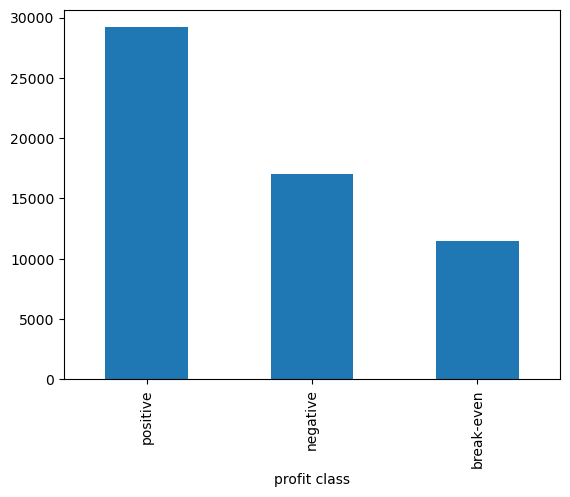

In [141]:
for x in data.columns:
    data[x].value_counts().plot(kind='bar')

In [142]:
objects=data.select_dtypes("O")
objects

,Customer Gender,Country,State,Product Category,Sub Category,day_name,month_name,age_class,profit class
0,F,United States,Washington,Accessories,Tires and Tubes,Friday,Feb,young,positive
1,F,United States,Washington,Clothing,Gloves,Saturday,Feb,young,positive
2,F,United States,Washington,Accessories,Tires and Tubes,Saturday,Feb,young,positive
3,F,United States,Washington,Accessories,Tires and Tubes,Saturday,Mar,young,positive
4,F,United States,Washington,Accessories,Tires and Tubes,Saturday,Mar,young,positive
...,...,...,...,...,...,...,...,...,...
34860,M,France,Charente-Maritime,Bikes,Mountain Bikes,Sunday,Mar,adult,negative
34861,M,France,Hauts de Seine,Bikes,Mountain Bikes,Sunday,Feb,adult,negative
34862,M,France,Hauts de Seine,Bikes,Mountain Bikes,Friday,Mar,adult,negative
34863,M,France,Hauts de Seine,Bikes,Mountain Bikes,Sunday,Apr,adult,negative


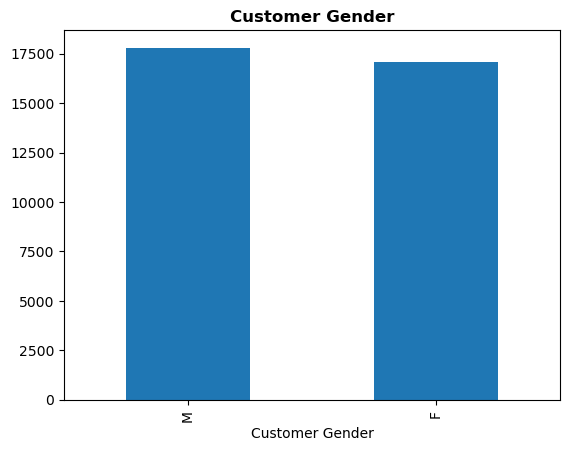

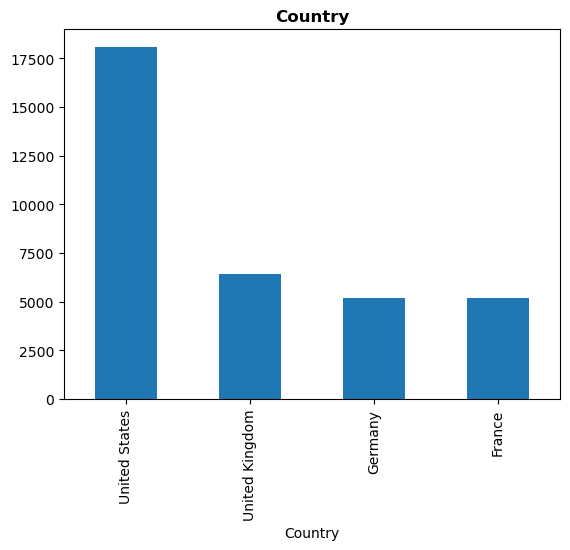

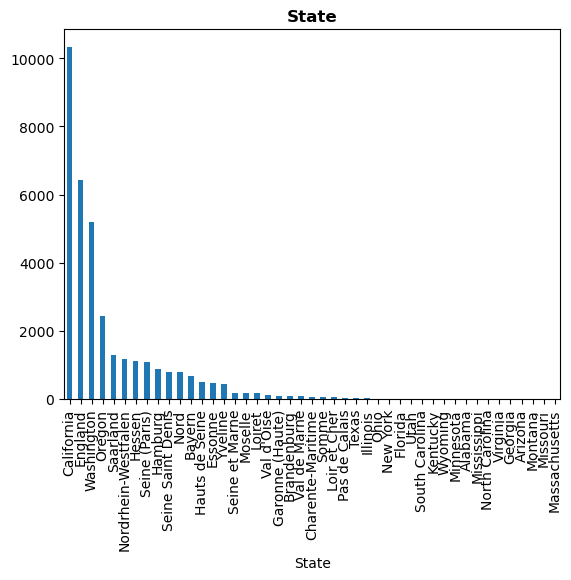

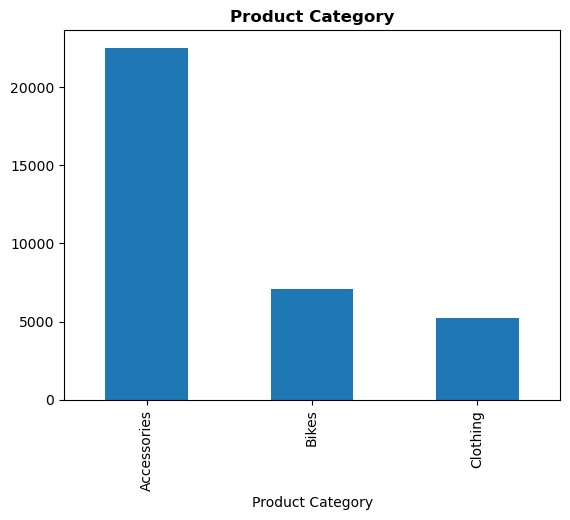

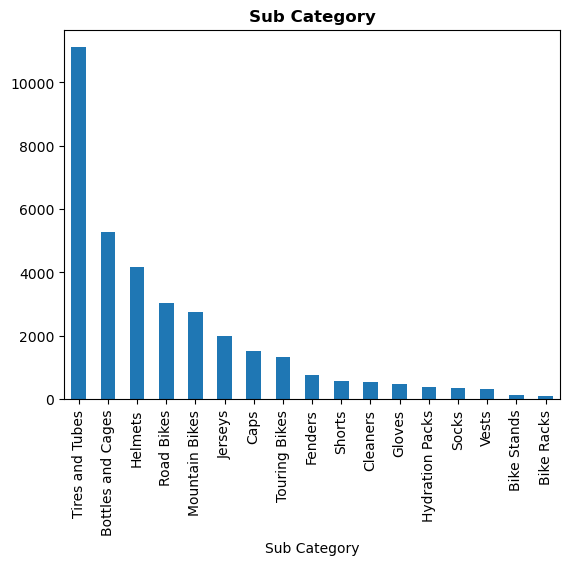

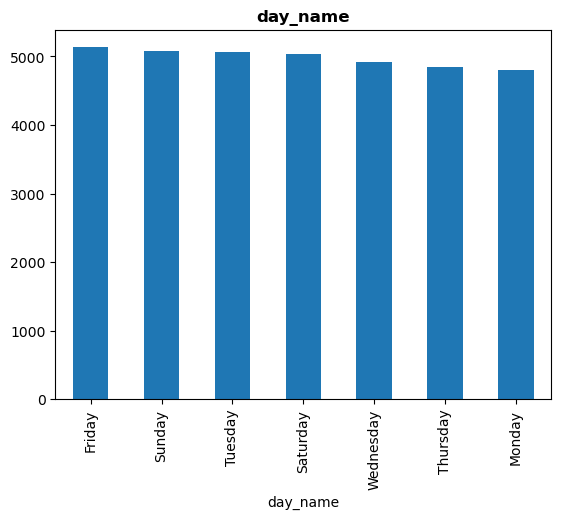

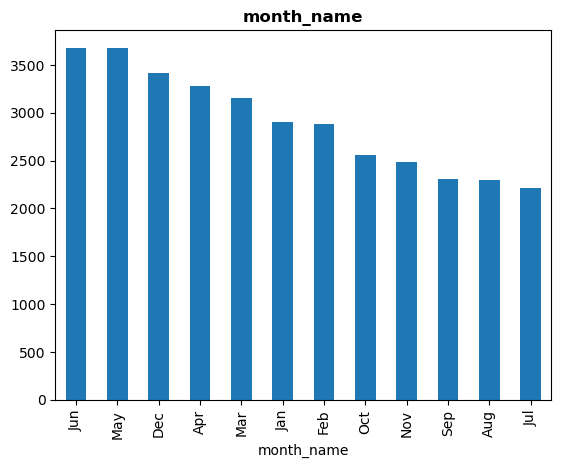

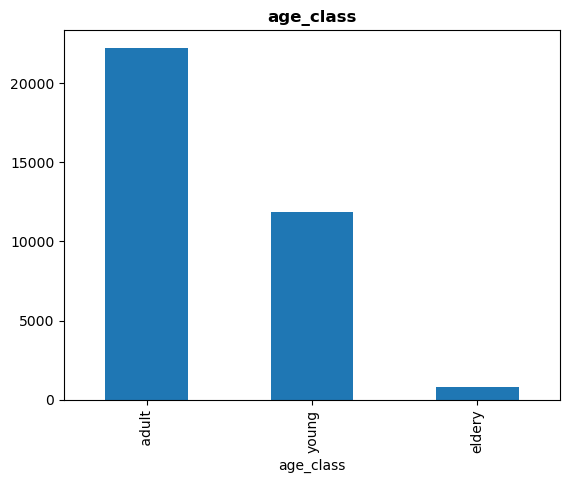

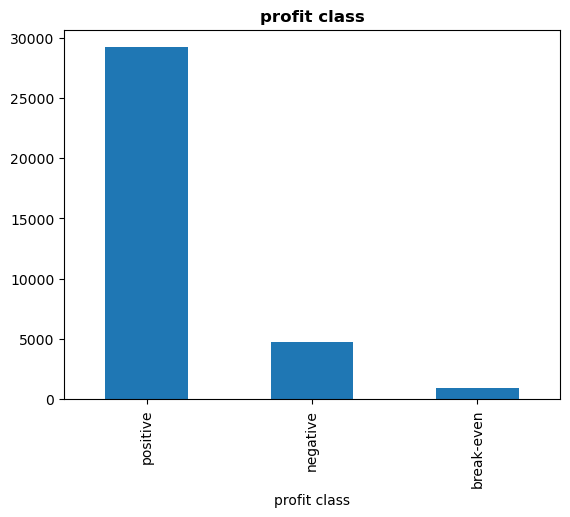

In [145]:
import matplotlib.pyplot as plt

for x in objects:
    plt.figure()
    data[x].value_counts().plot(kind='bar')
    plt.title(x , fontweight='bold')
    plt.show()
    